## exercise 3

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import *

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
           
qc.draw()

┌───┐     ┌─┐   
q1_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q1_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1: 2/═══════════╩══╩═
                 0  1

## Simulate Bell State Circuit

In [4]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result = job.result()
count = result.get_counts()

In [5]:
print(count)

{'11': 488, '00': 512}


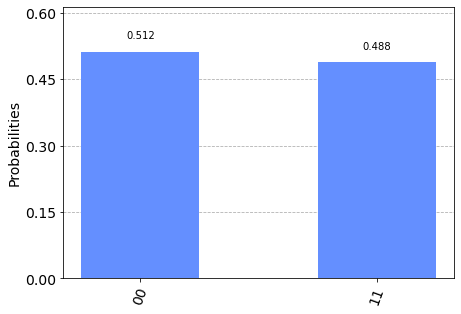

In [6]:
plot_histogram(count)

In [11]:
IBMQ.save_account('57f6aeded1f8cc67c5c2c88473942c33b8559a3fc2523d4c992a22db008a001d23a6c036a16f051d4251614f25a10141015e677baf41fbfe1893280ba944addf', overwrite=True)

In [12]:
from qiskit.providers.ibmq import least_busy

IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend_lb = least_busy(provider.backends(simulator=False, operational=True))
print("LB backend: ", backend_lb)

LB backend:  ibmq_armonk


In [13]:
from qiskit.tools.monitor import job_monitor

backend = backend_lb
shots = 1024
job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp, interval = 2)

results = job_exp.results()
count_dev = results.get_counts(qc)
plot_histogram(count_dev)

TranspilerError: 'Number of qubits (2) in circuit-1 is greater than maximum (1) in the coupling_map'